In [31]:
## simple turbidostat

def PW(period):
    def pw(n):
        if n % period == 0:
            return 1
        else:
            return 0

    return pw

T_MAX = 100
ts = np.arange(0, T_MAX)
dt = 0.1
k = 1.01
N_0 = 1
pw = PW(9)

N = np.zeros(T_MAX)

for n in ts:
    if n == 0:
        # apply initial conditions
        N[n] = N_0
    else:
        N[n] += N[n-1]
        N[n] = k * N[n-1] - 1/12 * pw(n) * N[n-1]



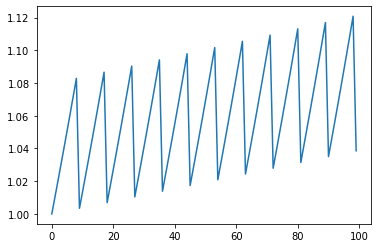

In [32]:
plt.plot(ts, N)

In [211]:
## simple turbidostat with growth limits on glucose

def PW(period):
    def pw(n):
        if n % period == 0 and n > 0:
            return 1
        else:
            return 0

    return pw

T_MAX = 400
ts = np.arange(0, T_MAX)
dt = 0.025
k1 = 1.01
N_0 = 1
G_0 = 5
km_glc= 1
pw = PW(30)

N = np.zeros(T_MAX+1)
G = np.zeros(T_MAX+1)
N[0] = N_0
G[0] = G_0

for n in ts:
    N[n+1] = N[n] + dt *  (k1 * G[n] / (km_glc + G[n]) * N[n])                      - 1/12 * pw(n) * N[n]
    G[n+1] = G[n] + dt * -(k1 * G[n] / (km_glc + G[n]) * N[n]) + 1/12 * pw(n) * G_0 - 1/12 * pw(n) * G[n]
        



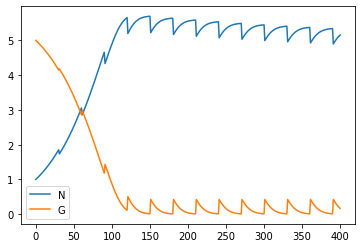

In [212]:
plt.plot(N, label="N")
plt.plot(G, label="G")
plt.legend()


In [277]:
## simple turbidostat with growth limits on glucose and some death rates

def PW(period):
    def pw(n):
        if n % period == 0 and n > 0:
            return 1
        else:
            return 0

    return pw

T_MAX = 2000
ts = np.arange(0, T_MAX)
dt = 0.025
k1 = 0.2 
d1 = 0.001
N_0 = 1
G_0 = 5
km_glc= 1
pw = PW(22)

N = np.zeros(T_MAX+1)
G = np.zeros(T_MAX+1)
N[0] = N_0
G[0] = G_0

for n in ts:
    N[n+1] = N[n] + dt *  (k1 * G[n] / (km_glc + G[n]) * N[n])                      - 1/12 * pw(n) * N[n] \
              - dt * (d1 * N[n])
    
    
    G[n+1] = G[n] + dt * -(k1 * G[n] / (km_glc + G[n]) * N[n]) + 1/12 * pw(n) * G_0 - 1/12 * pw(n) * G[n]
        



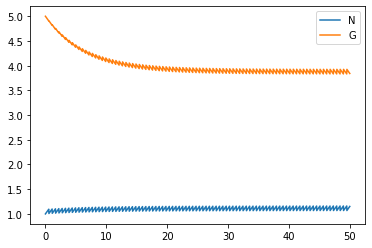

In [278]:
plt.plot(dt * np.arange(0, T_MAX+1), N, label="N")
plt.plot(dt * np.arange(0, T_MAX+1), G, label="G")
plt.legend()


In [290]:
## simple turbidostat with growth limits on glucose and some death rates
## dilution only turns on after some N limit has been reached. 

def PW(period):
    def pw(n):
        if n % period == 0 and n > 0:
            return 1
        else:
            return 0

    return pw

def pump_active(limit):
    def pa(N):
        return int(N > limit)
    return pa

T_MAX = 2000
ts = np.arange(0, T_MAX)
dt = 0.01
k1 = 0.2 
d1 = 0.001
N_0 = 1
G_0 = 5
km_glc= 1
pw = PW(22)
pa = pump_active(4)

N = np.zeros(T_MAX+1)
G = np.zeros(T_MAX+1)
N[0] = N_0
G[0] = G_0

for n in ts:
    N[n+1] = (N[n] 
              + dt *  (k1 * G[n] / (km_glc + G[n]) * N[n])                    
              - 1/12 * pa(N[n]) * pw(n) * N[n] 
              - dt * (d1 * N[n]) 
             )
    
    G[n+1] = G[n] \
            + dt * -(k1 * G[n] / (km_glc + G[n]) * N[n]) \
            + pa(N[n]) * (1/12 * pw(n) * G_0 - 1/12 * pw(n) * G[n])
        



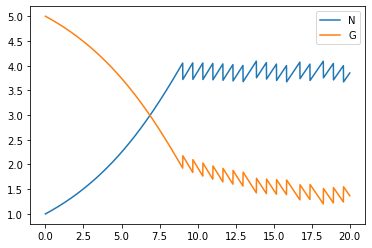

In [291]:
plt.plot(dt * np.arange(0, T_MAX+1), N, label="N")
plt.plot(dt * np.arange(0, T_MAX+1), G, label="G")
plt.legend()
